# **Analysis**

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# **Modeling**

##Inflation vs Ethereum

In [135]:
# --- Data Loading and Preparation ---
btc_df = pd.read_csv("BTC.csv")
eth_df = pd.read_csv("ETH.csv")

In [136]:
# Convert timestamp to datetime and set as index
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp']).dt.normalize()
eth_df['timestamp'] = pd.to_datetime(eth_df['timestamp']).dt.normalize()
btc_df.set_index('timestamp', inplace=True)
eth_df.set_index('timestamp', inplace=True)

In [137]:
inflation_df = pd.read_csv("InflationRate.csv")
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  11 non-null     int64  
 1   United Arab Emirates  11 non-null     float64
 2   Switzerland           11 non-null     float64
 3   China                 11 non-null     float64
 4   United Kingdom        11 non-null     float64
 5   Lebanon               11 non-null     float64
 6   United States         11 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 748.0 bytes


In [138]:
inflation_df['Year'] = pd.to_datetime(inflation_df['Year'], format='%Y')
inflation_df.set_index('Year', inplace=True)
inflation_df.index = inflation_df.index.year

In [139]:
#drop first row
inflation_df = inflation_df.iloc[1:]
inflation_df['Avg'] = inflation_df.mean(axis=1)

In [140]:
# set create a new dataframe from eth_df to be grouprd by year like inflation_df
eth_df_yearly = eth_df.resample('Y').last()
eth_df_yearly.index= eth_df_yearly.index.year
eth_df_yearly = eth_df_yearly.rename(columns={'close': 'ETH_Close'})

/tmp/ipython-input-1222278430.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  eth_df_yearly = eth_df.resample('Y').last()


In [141]:
eth_df_yearly

,open,high,low,ETH_Close,volume,marketCap,CirculatingSupply,SupplyGrowthRate
timestamp,,,,,,,,
2015,0.912098,0.975414,0.910277,0.933542,663994,7.085802e+07,7.590234e+07,0.033208
2016,8.151150,8.158560,7.909380,7.969100,9066800,6.969936e+08,8.746202e+07,0.035703
2017,712.211975,760.348022,710.119019,756.732971,2554269952,7.317017e+10,9.669219e+07,0.021177
2018,140.031074,140.181157,132.519392,133.368263,2358360234,1.388684e+10,1.041240e+08,0.018271
2019,132.612268,133.732674,128.798150,129.610859,8936866397,1.413977e+10,1.090940e+08,0.009509
2020,751.626643,754.299440,726.511908,737.803398,13926846861,8.415681e+10,1.140640e+08,0.011769
2021,3713.430093,3807.288920,3636.869897,3682.632905,14157285268,4.380000e+11,1.189714e+08,0.011136
2022,1199.360110,1205.088661,1194.203758,1196.771239,3018513333,1.460000e+11,1.223743e+08,0.000154
2023,2291.945237,2318.512837,2261.394177,2281.471302,6871481744,2.740000e+11,1.201830e+08,0.000081


In [142]:
# combine the 2 datasets
eth_inflation_df = pd.merge(inflation_df, eth_df_yearly, left_index=True, right_index=True, how='inner')

In [143]:
eth_inflation_df

,United Arab Emirates,Switzerland,China,United Kingdom,Lebanon,United States,Avg,open,high,low,ETH_Close,volume,marketCap,CirculatingSupply,SupplyGrowthRate
2015,4.069966,-1.143909,1.437024,0.368047,-3.749145,0.118627,0.183435,0.912098,0.975414,0.910277,0.933542,663994,7.085802e+07,7.590234e+07,0.033208
2016,1.617488,-0.434619,2.000002,1.008417,-0.783360,1.261583,0.778252,8.151150,8.158560,7.909380,7.969100,9066800,6.969936e+08,8.746202e+07,0.035703
2017,1.966826,0.533788,1.593136,2.557756,4.321352,2.130110,2.183828,712.211975,760.348022,710.119019,756.732971,2554269952,7.317017e+10,9.669219e+07,0.021177
2018,3.068634,0.936335,2.074790,2.292840,6.076989,2.442583,2.815362,140.031074,140.181157,132.519392,133.368263,2358360234,1.388684e+10,1.041240e+08,0.018271
2019,-1.931081,0.362886,2.899234,1.738105,3.005389,1.812210,1.314457,132.612268,133.732674,128.798150,129.610859,8936866397,1.413977e+10,1.090940e+08,0.009509
2020,-2.079403,-0.725875,2.419422,0.989487,84.864333,1.233584,14.450258,751.626643,754.299440,726.511908,737.803398,13926846861,8.415681e+10,1.140640e+08,0.011769
2021,0.179935,0.581814,0.981015,2.518371,154.756096,4.697859,27.285848,3713.430093,3807.288920,3636.869897,3682.632905,14157285268,4.380000e+11,1.189714e+08,0.011136
2022,5.291226,2.835028,1.973576,7.922049,171.205491,8.002800,32.871695,1199.360110,1205.088661,1194.203758,1196.771239,3018513333,1.460000e+11,1.223743e+08,0.000154
2023,1.626708,2.135401,0.234837,6.793967,221.341644,4.116338,39.374816,2291.945237,2318.512837,2261.394177,2281.471302,6871481744,2.740000e+11,1.201830e+08,0.000081
2024,1.663365,1.062340,0.218129,3.271573,45.243042,2.949525,9.067996,3356.394805,3444.396634,3311.412658,3332.531721,20845452085,4.010000e+11,1.204682e+08,-0.002105


In [144]:
#standardize eth_inflation_df
eth_inflation_df = (eth_inflation_df - eth_inflation_df.mean()) / eth_inflation_df.std()

In [145]:
# create linear regression of ETH_close as a function United Arab, ... , United States seperatly
countries = eth_inflation_df.columns[0:6]
dependents = eth_inflation_df.columns[-5:-1]
r2={}
for country in countries:
  for dependent in dependents:
    y=eth_inflation_df[dependent].values.reshape(-1,1)
    x=eth_inflation_df[country].values.reshape(-1,1)
    model=LinearRegression()
    model.fit(x,y)
    name=country + " " + dependent
    r2[name]=r2_score(y,model.predict(x))

In [146]:
# compute the highest scores and their names
highest_scores = sorted(r2.items(), key=lambda x: x[1], reverse=True)[:5]

In [147]:
highest_scores

[('China marketCap', 0.5896648477311668),
 ('China ETH_Close', 0.58839729082318),
 ('Lebanon CirculatingSupply', 0.5251306822412414),
 ('United States CirculatingSupply', 0.512980215347314),
 ('Switzerland CirculatingSupply', 0.509114920765178)]

In [148]:
for dependent in dependents:
  y=eth_inflation_df[dependent].values.reshape(-1,1)
  x=eth_inflation_df["Avg"].values.reshape(-1,1)
  model=LinearRegression()
  model.fit(x,y)
  print(f"Avg {dependent}: {r2_score(y,model.predict(x))}")

Avg ETH_Close: 0.3692704978043928
Avg volume: 0.055919278890361857
Avg marketCap: 0.37820959522414044
Avg CirculatingSupply: 0.5276535459490226


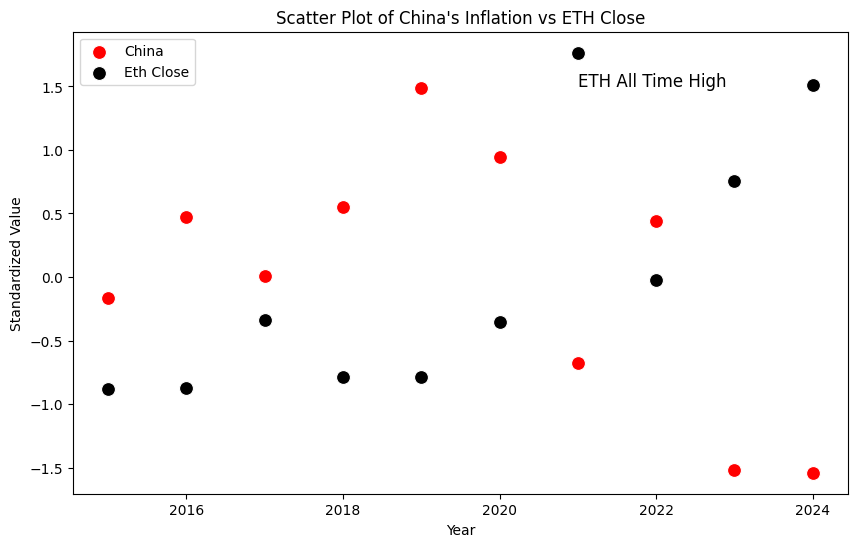

In [149]:
#plot based on highest scores
plt.figure(figsize=(10, 6))
sns.scatterplot(eth_inflation_df['China'], label='China',color ='red', s=100)
sns.scatterplot(eth_inflation_df['ETH_Close'], label='Eth Close', color ='black',s=100)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of China's Inflation vs ETH Close")
plt.legend()
plt.text(x=2021,y=1.5, s="ETH All Time High", fontsize=12)
plt.show()

59% of Ethereum variability is expalined by the variability of China's Inflation Rate.
From the graph we can deduce a remarkable relationship between these 2 variables before 2022



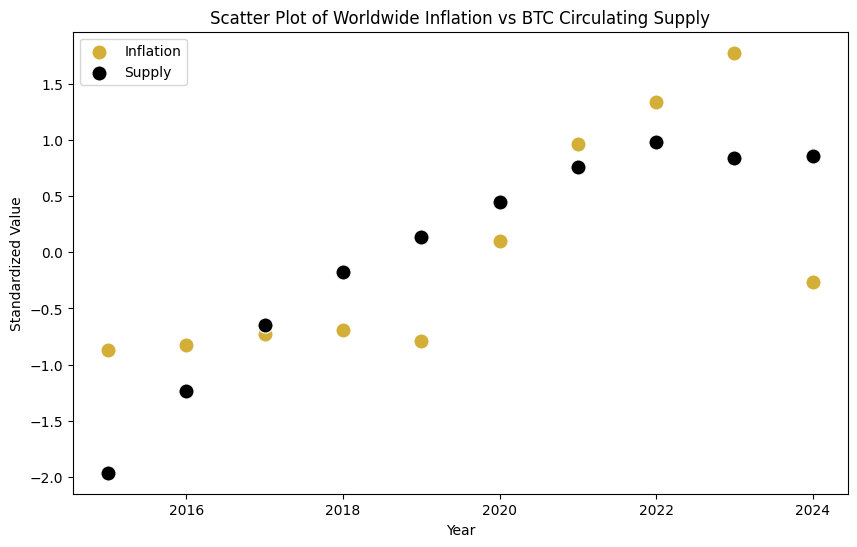

In [150]:
#plot based on highest scores
plt.figure(figsize=(10, 6))
sns.scatterplot(eth_inflation_df['Avg'], label='Inflation',color ='#d4af37', s=120)
sns.scatterplot(eth_inflation_df['CirculatingSupply'], label='Supply', color ='Black',s=120)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of Worldwide Inflation vs ETH Circulating Supply")
plt.legend()
plt.show()

## Exchange Rate

In [151]:
exchange_df=pd.read_csv("ExchangeRate.csv")
exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   United Arab Emirates  11 non-null     float64
 1   Switzerland           11 non-null     float64
 2   China                 11 non-null     float64
 3   United Kingdom        11 non-null     float64
 4   Lebanon               11 non-null     float64
 5   Saudi Arabia          11 non-null     float64
 6   Year                  11 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 748.0 bytes


In [152]:
exchange_df['Year'] = pd.to_datetime(exchange_df['Year'], format='%Y')
exchange_df.set_index('Year', inplace=True)
exchange_df.index = exchange_df.index.year

In [153]:
exchange_df['Avg']=exchange_df.mean(axis=1)

In [154]:
# combine the 2 datasets
eth_exchange_df = pd.merge(exchange_df, eth_df_yearly, left_index=True, right_index=True, how='inner')

In [155]:
#standardize
eth_exchange_df = (eth_exchange_df - eth_exchange_df.mean()) / eth_exchange_df.std()

In [156]:
# create linear regression of ETH_close as a function United Arab, ... , United States seperatly
countries = eth_exchange_df.columns[0:5]
dependents = eth_exchange_df.columns[-5:-1]
r2={}
for country in countries:
  for dependent in dependents:
    y=eth_exchange_df[dependent].values.reshape(-1,1)
    x=eth_exchange_df[country].values.reshape(-1,1)
    model=LinearRegression()
    model.fit(x,y)
    name=country + " " + dependent
    r2[name]=r2_score(y,model.predict(x))

In [157]:
# compute the highest scores and their names
highest_scores = sorted(r2.items(), key=lambda x: x[1], reverse=True)[:5]

In [158]:
highest_scores

[('Switzerland marketCap', 0.7842135797858358),
 ('Switzerland ETH_Close', 0.7714319399604416),
 ('United Kingdom CirculatingSupply', 0.5801634267137953),
 ('Switzerland volume', 0.5306720098882598),
 ('Lebanon volume', 0.45773761430518023)]

In [159]:
for dependent in dependents:
  y=eth_exchange_df[dependent].values.reshape(-1,1)
  x=eth_exchange_df["Avg"].values.reshape(-1,1)
  model=LinearRegression()
  model.fit(x,y)
  print(f"Avg {dependent}: {r2_score(y,model.predict(x))}")

Avg ETH_Close: 0.3279624721061103
Avg volume: 0.45773967817634487
Avg marketCap: 0.33518245891108733
Avg CirculatingSupply: 0.11830527708932514


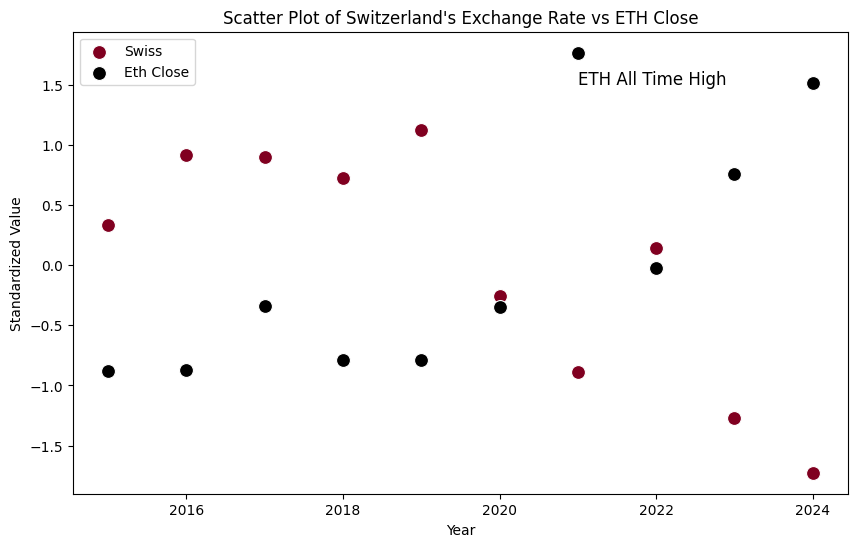

In [160]:
#plot based on highest scores
plt.figure(figsize=(10, 6))
sns.scatterplot(eth_exchange_df['Switzerland'], label='Swiss',color ='#800020', s=100)
sns.scatterplot(eth_exchange_df['ETH_Close'], label='Eth Close', color ='black',s=100)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of Switzerland's Exchange Rate vs ETH Close")
plt.legend()
plt.text(x=2021,y=1.5, s="ETH All Time High", fontsize=12)
plt.show()

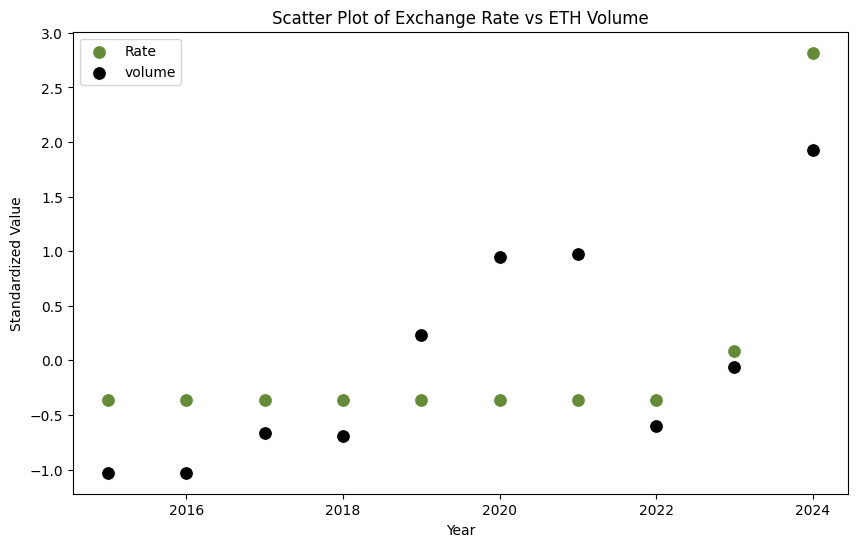

In [161]:
plt.figure(figsize=(10, 6))
sns.scatterplot(eth_exchange_df['Avg'], label='Rate',color ='#658b38', s=100)
sns.scatterplot(eth_exchange_df['volume'], label='volume', color ='black',s=100)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of Exchange Rate vs ETH Volume")
plt.legend()
plt.show()

## Unemployment

In [162]:
unemp_df=pd.read_csv('UnemploymentRate.csv')
unemp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   United Arab Emirates  11 non-null     float64
 1   Switzerland           11 non-null     float64
 2   China                 11 non-null     float64
 3   France                11 non-null     float64
 4   United Kingdom        11 non-null     float64
 5   Saudi Arabia          11 non-null     float64
 6   United States         11 non-null     float64
 7   Year                  11 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 836.0 bytes


In [163]:
unemp_df['Year'] = pd.to_datetime(unemp_df['Year'], format='%Y')
unemp_df.set_index('Year', inplace=True)
unemp_df.index = unemp_df.index.year

In [164]:
unemp_df['Avg']=unemp_df.mean(axis=1)

In [165]:
# combine the 2 datasets
eth_unemp_df = pd.merge(unemp_df, eth_df_yearly, left_index=True, right_index=True, how='inner')

In [166]:
#standardize
eth_unemp_df = (eth_unemp_df - eth_unemp_df.mean()) / eth_unemp_df.std()

In [167]:
eth_unemp_df

,United Arab Emirates,Switzerland,China,France,United Kingdom,Saudi Arabia,United States,Avg,open,high,low,ETH_Close,volume,marketCap,CirculatingSupply,SupplyGrowthRate
2015,-0.635547,0.597662,-1.217810,1.617370,1.951427,-0.012853,0.443634,0.670775,-0.876648,-0.874761,-0.877123,-0.880385,-1.028906,-0.861445,-1.961528,1.454398
2016,-1.117318,0.938934,-1.304921,1.356036,0.833096,-0.012853,0.140603,0.238152,-0.871487,-0.869760,-0.872050,-0.875329,-1.027716,-0.857711,-1.230824,1.642226
2017,-0.047005,0.585995,-1.601098,0.785851,0.123486,0.233987,-0.238369,0.042242,-0.369588,-0.346020,-0.363087,-0.337228,-0.667362,-0.425482,-0.647371,0.548615
2018,-0.341276,0.340980,0.193386,0.441805,-0.495683,0.352300,-0.576790,-0.048520,-0.777475,-0.777834,-0.781732,-0.785211,-0.695099,-0.779047,-0.177595,0.329818
2019,-0.217578,-0.589495,0.576674,-0.088783,-1.344433,0.017789,-0.744158,-0.497098,-0.782764,-0.782324,-0.784429,-0.787911,0.236298,-0.777538,0.136566,-0.329853
2020,2.338413,0.644332,1.378094,-0.446029,0.153053,1.740559,2.489644,2.042929,-0.341491,-0.350231,-0.351205,-0.350832,0.942789,-0.359958,0.450728,-0.159710
2021,0.790235,1.216034,0.506985,-0.567457,0.754830,0.856193,0.494508,0.727273,1.769871,1.775525,1.758229,1.765480,0.975415,1.750356,0.760932,-0.207350
2022,0.486849,-1.382878,0.489563,-1.067248,-1.151377,-0.022216,-0.758166,-0.718903,-0.022318,-0.036353,-0.012221,-0.020993,-0.601633,0.008874,0.976032,-1.034179
2023,-0.451953,-1.613309,0.437297,-1.039091,-0.704392,-1.367916,-0.767014,-1.277076,0.756546,0.738910,0.761281,0.758530,-0.056123,0.772263,0.837517,-1.039702
2024,-0.804818,-0.738254,0.541830,-0.992455,-0.120008,-1.784990,-0.483891,-1.179775,1.515354,1.522848,1.522337,1.513878,1.922338,1.529688,0.855545,-1.204263


In [168]:
# create linear regression of ETH_close as a function United Arab, ... , United States seperatly
countries = eth_unemp_df.columns[0:8]
dependents = eth_unemp_df.columns[-5:-1]
r2={}
for country in countries:
  for dependent in dependents:
    y=eth_unemp_df[dependent].values.reshape(-1,1)
    x=eth_unemp_df[country].values.reshape(-1,1)
    model=LinearRegression()
    model.fit(x,y)
    name=country + " " + dependent
    r2[name]=r2_score(y,model.predict(x))

In [169]:
# compute the highest scores and their names
highest_scores = sorted(r2.items(), key=lambda x: x[1], reverse=True)[:5]
highest_scores

[('France CirculatingSupply', 0.9636103580569528),
 ('China CirculatingSupply', 0.6742903439828298),
 ('France marketCap', 0.4944668321292518),
 ('France ETH_Close', 0.48479358114793747),
 ('United Kingdom CirculatingSupply', 0.4748313933255861)]

In [170]:
for dependent in dependents:
  y=eth_unemp_df[dependent].values.reshape(-1,1)
  x=eth_unemp_df["Avg"].values.reshape(-1,1)
  model=LinearRegression()
  model.fit(x,y)
  print(f"Avg {dependent}: {r2_score(y,model.predict(x))}")

Avg ETH_Close: 0.08064738604590971
Avg volume: 0.0003786890667103471
Avg marketCap: 0.08574818519632721
Avg CirculatingSupply: 0.11124961439260528


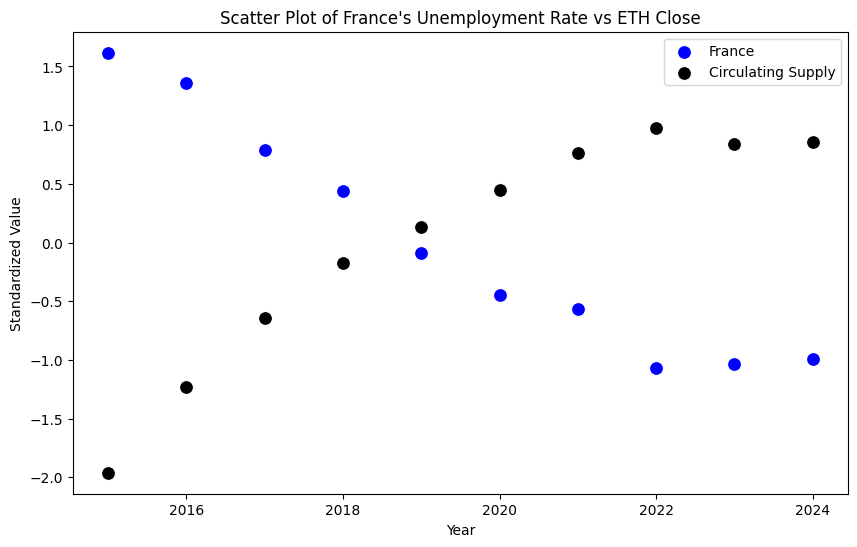

In [206]:
#plot based on highest scores
plt.figure(figsize=(10, 6))
sns.scatterplot(eth_unemp_df['France'], label='France',color ='Blue', s=100)
sns.scatterplot(eth_unemp_df['CirculatingSupply'], label='Circulating Supply', color ='black',s=100)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of France's Unemployment Rate vs ETH Close")
plt.legend()
plt.show()

#**Model with all macroeconomic data**

In [189]:
inflation_df = inflation_df.rename(columns={'Avg': 'Avg_inflation'})
exchange_df = exchange_df.rename(columns={'Avg': 'Avg_exchange'})
unemp_df = unemp_df.rename(columns={'Avg': 'Avg_unemp'})

In [190]:
macro=pd.merge(inflation_df['Avg_inflation'],exchange_df['Avg_exchange'],left_index=True,right_index=True,how='inner')

In [191]:
macro=pd.merge(macro,unemp_df['Avg_unemp'],left_index=True,right_index=True,how='inner')

In [192]:
# combine the 2 datasets
eth_macro_df = pd.merge(macro, eth_df_yearly, left_index=True, right_index=True, how='inner')

In [193]:
#standardize
eth_macro_df = (eth_macro_df - eth_macro_df.mean()) / eth_macro_df.std()

In [205]:
# create a model where x is avg inflation, exhange rate, unemployment and y is dependents of bitcoin
dependents=eth_macro_df.columns[6:11]
for dependent in dependents:
  y=eth_macro_df[dependent].values.reshape(-1,1)
  x=eth_macro_df[["Avg_inflation","Avg_exchange","Avg_unemp"]].values.reshape(-1,3)
  model=LinearRegression()
  model.fit(x,y)
  print(f"Avg {dependent}: {r2_score(y,model.predict(x))},   {model.coef_}")

Avg ETH_Close: 0.7365459902108333,   [[0.67169978 0.68447137 0.224002  ]]
Avg volume: 0.71273910010231,   [[0.38419947 0.93448246 0.53192906]]
Avg marketCap: 0.7511030759017423,   [[0.6775596  0.68812283 0.21847618]]
Avg CirculatingSupply: 0.6502430930849801,   [[0.73950304 0.36803301 0.04052604]]
Avg SupplyGrowthRate: 0.7039303869759537,   [[-0.64504972 -0.41718433  0.13338055]]


The average macroeconomic indicators affect best the ETH Price